In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set(style="darkgrid")
from matplotlib import gridspec
import matplotlib.cm as cm
import warnings
import os.path as osp
from mpl_toolkits import mplot3d

warnings.filterwarnings(action='once')
print(sns.__version__, pd.__version__, np.__version__)

0.9.0 0.23.0 1.15.1


# Visualization of raw lidar measurements together with a histogram of these values

In [2]:
ith_demonstration = 0
raw = np.load('../../data/data_toy/data_new_sampler.pkl'.format(ith_demonstration))
data = raw[0]["lidar"]["measurements"]
data = np.array(data)
num_samples, num_channels = data.shape
stepsize = 1

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:226: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:


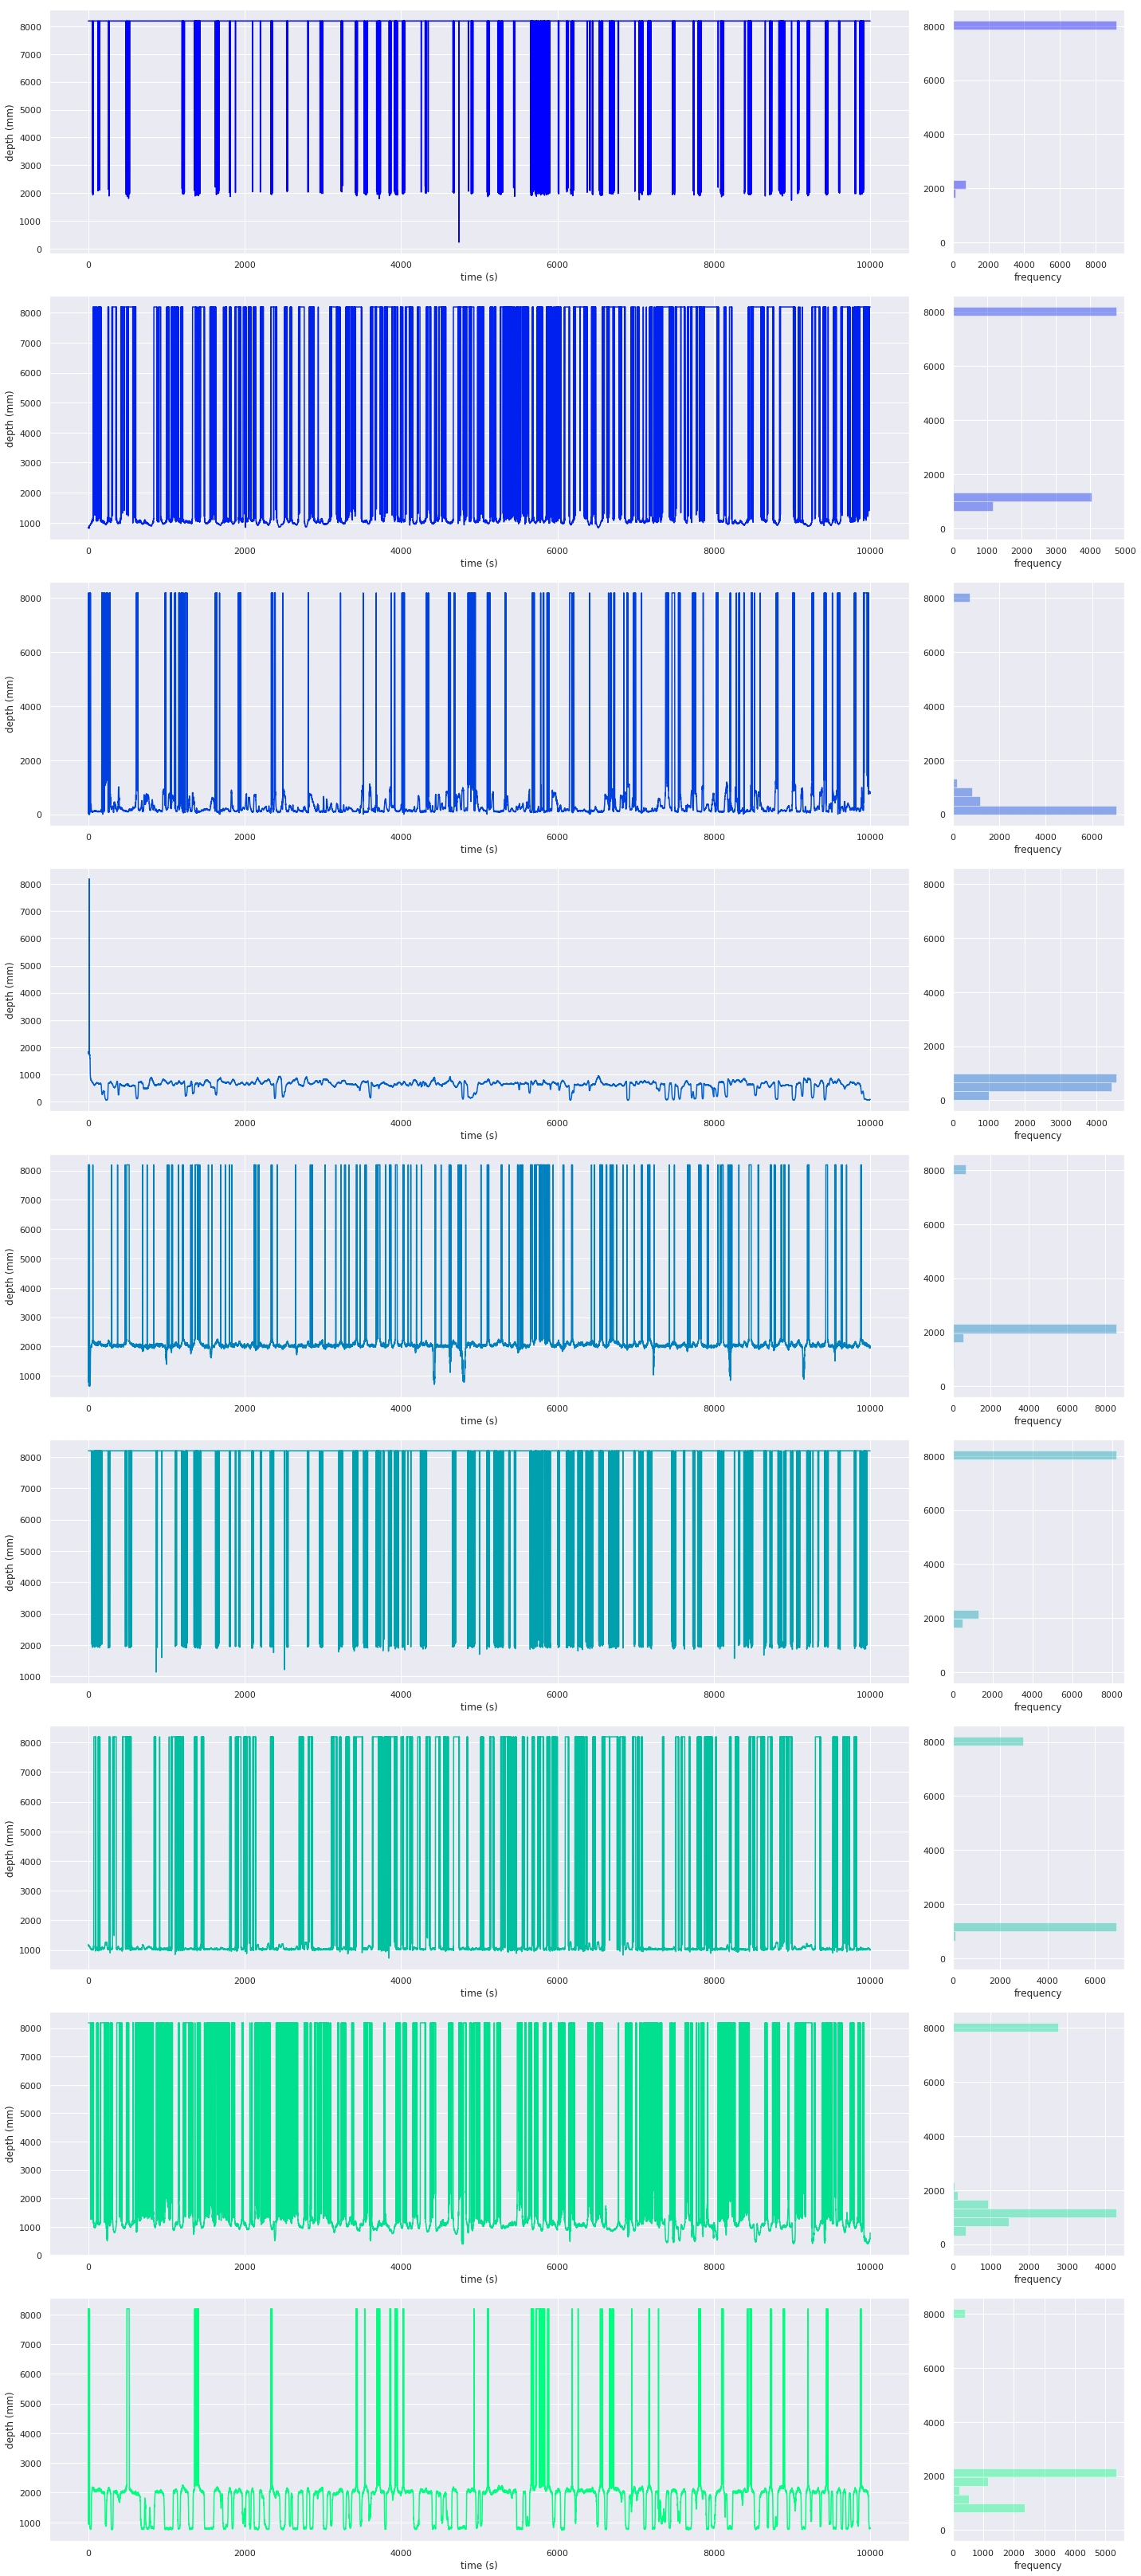

In [3]:
t = np.arange(num_samples)
colors = cm.winter(np.linspace(0, 1, num_channels))
fig = plt.figure(figsize=(20, 5*num_channels))
idxs = [i for i in range(0, num_samples, stepsize)]

for idx in range(num_channels):
    x = idx % num_channels
    y = 0
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time (s)')
    plt.ylabel('depth (mm)')
    ax0.plot(t[idxs], data[idxs, idx], color=colors[idx])

    ax1 = plt.subplot(gs[x, y+1])
    sns.distplot(data[idxs, idx], ax=ax1, vertical=True, bins=25, kde=False,
                 hist_kws={"color": colors[idx], "range": (np.min(data), np.max(data))}, 
                 kde_kws={"color": colors[idx], "lw": 3})
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
plt.close()

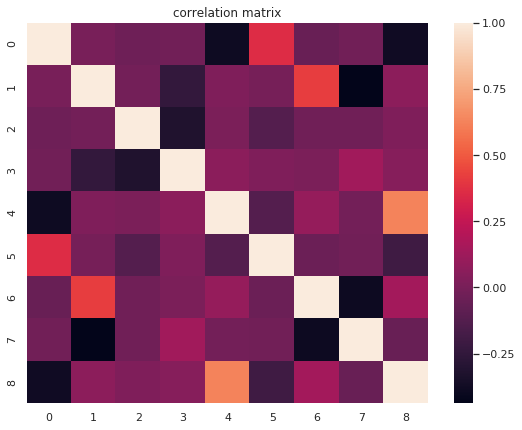

In [4]:
fig = plt.figure(figsize=(9,7))
corr = np.corrcoef(data.T)
sns.heatmap(corr)
plt.title('correlation matrix')
plt.show()
plt.close()

# Visualization of clipped lidar measurements together with a histogram of these values

In [5]:
ith_demonstration = 0
raw = np.load('../../data/data_toy/data_new_sampler.pkl'.format(ith_demonstration))
data = raw[0]["lidar"]["measurements"]
data = np.array(data)
num_samples, num_channels = data.shape
stepsize = 1
min_depth, max_depth = 14, 2000
# clip to min and max
data[data >= max_depth] = max_depth
data[data <= min_depth] = min_depth

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:226: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:


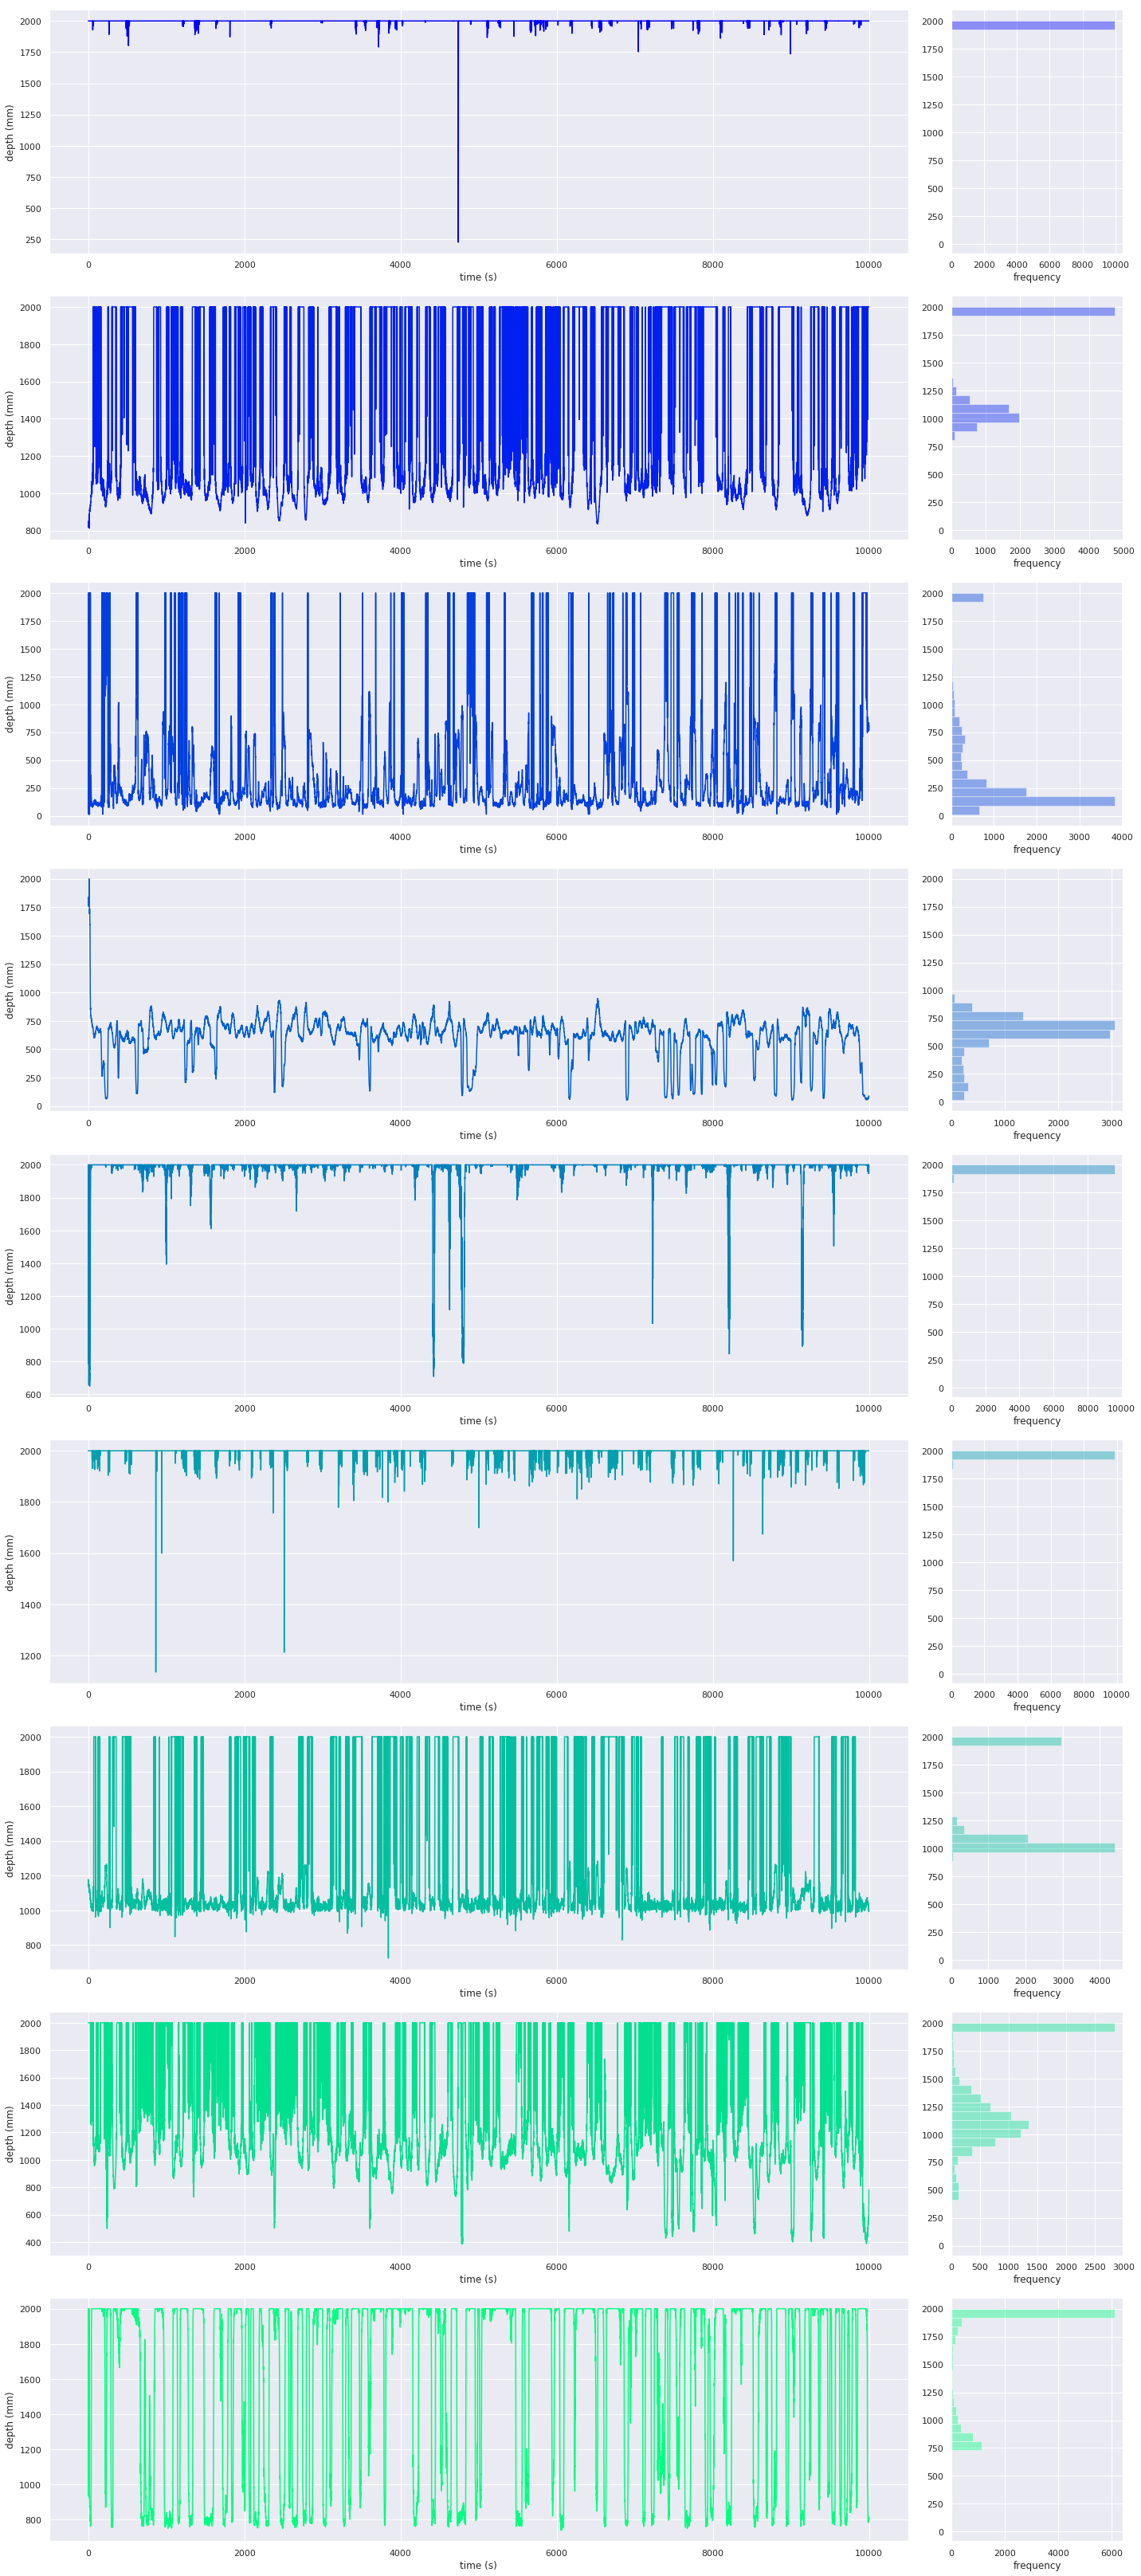

In [6]:
t = np.arange(num_samples)
colors = cm.winter(np.linspace(0, 1, num_channels))
fig = plt.figure(figsize=(20, 5*num_channels))
idxs = [i for i in range(0, num_samples, stepsize)]

for idx in range(num_channels):
    x = idx % num_channels
    y = 0
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time (s)')
    plt.ylabel('depth (mm)')
    ax0.plot(t[idxs], data[idxs, idx], color=colors[idx])

    ax1 = plt.subplot(gs[x, y+1])
    sns.distplot(data[idxs, idx], ax=ax1, vertical=True, bins=25, kde=False,
                 hist_kws={"color": colors[idx], "range": (np.min(data), np.max(data))}, 
                 kde_kws={"color": colors[idx], "lw": 3})
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
plt.close()

# Visualization of  clipped and downsampled lidar measurements together with a histogram of these values

In [7]:
ith_demonstration = 0
raw = np.load('../../data/data_toy/data_new_sampler.pkl'.format(ith_demonstration))
data = raw[0]["lidar"]["measurements"]
data = np.array(data)
num_samples, num_channels = data.shape
stepsize = 25
min_depth, max_depth = 14, 2000
# clip to min and max
data[data >= max_depth] = max_depth
data[data <= min_depth] = min_depth

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:226: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:


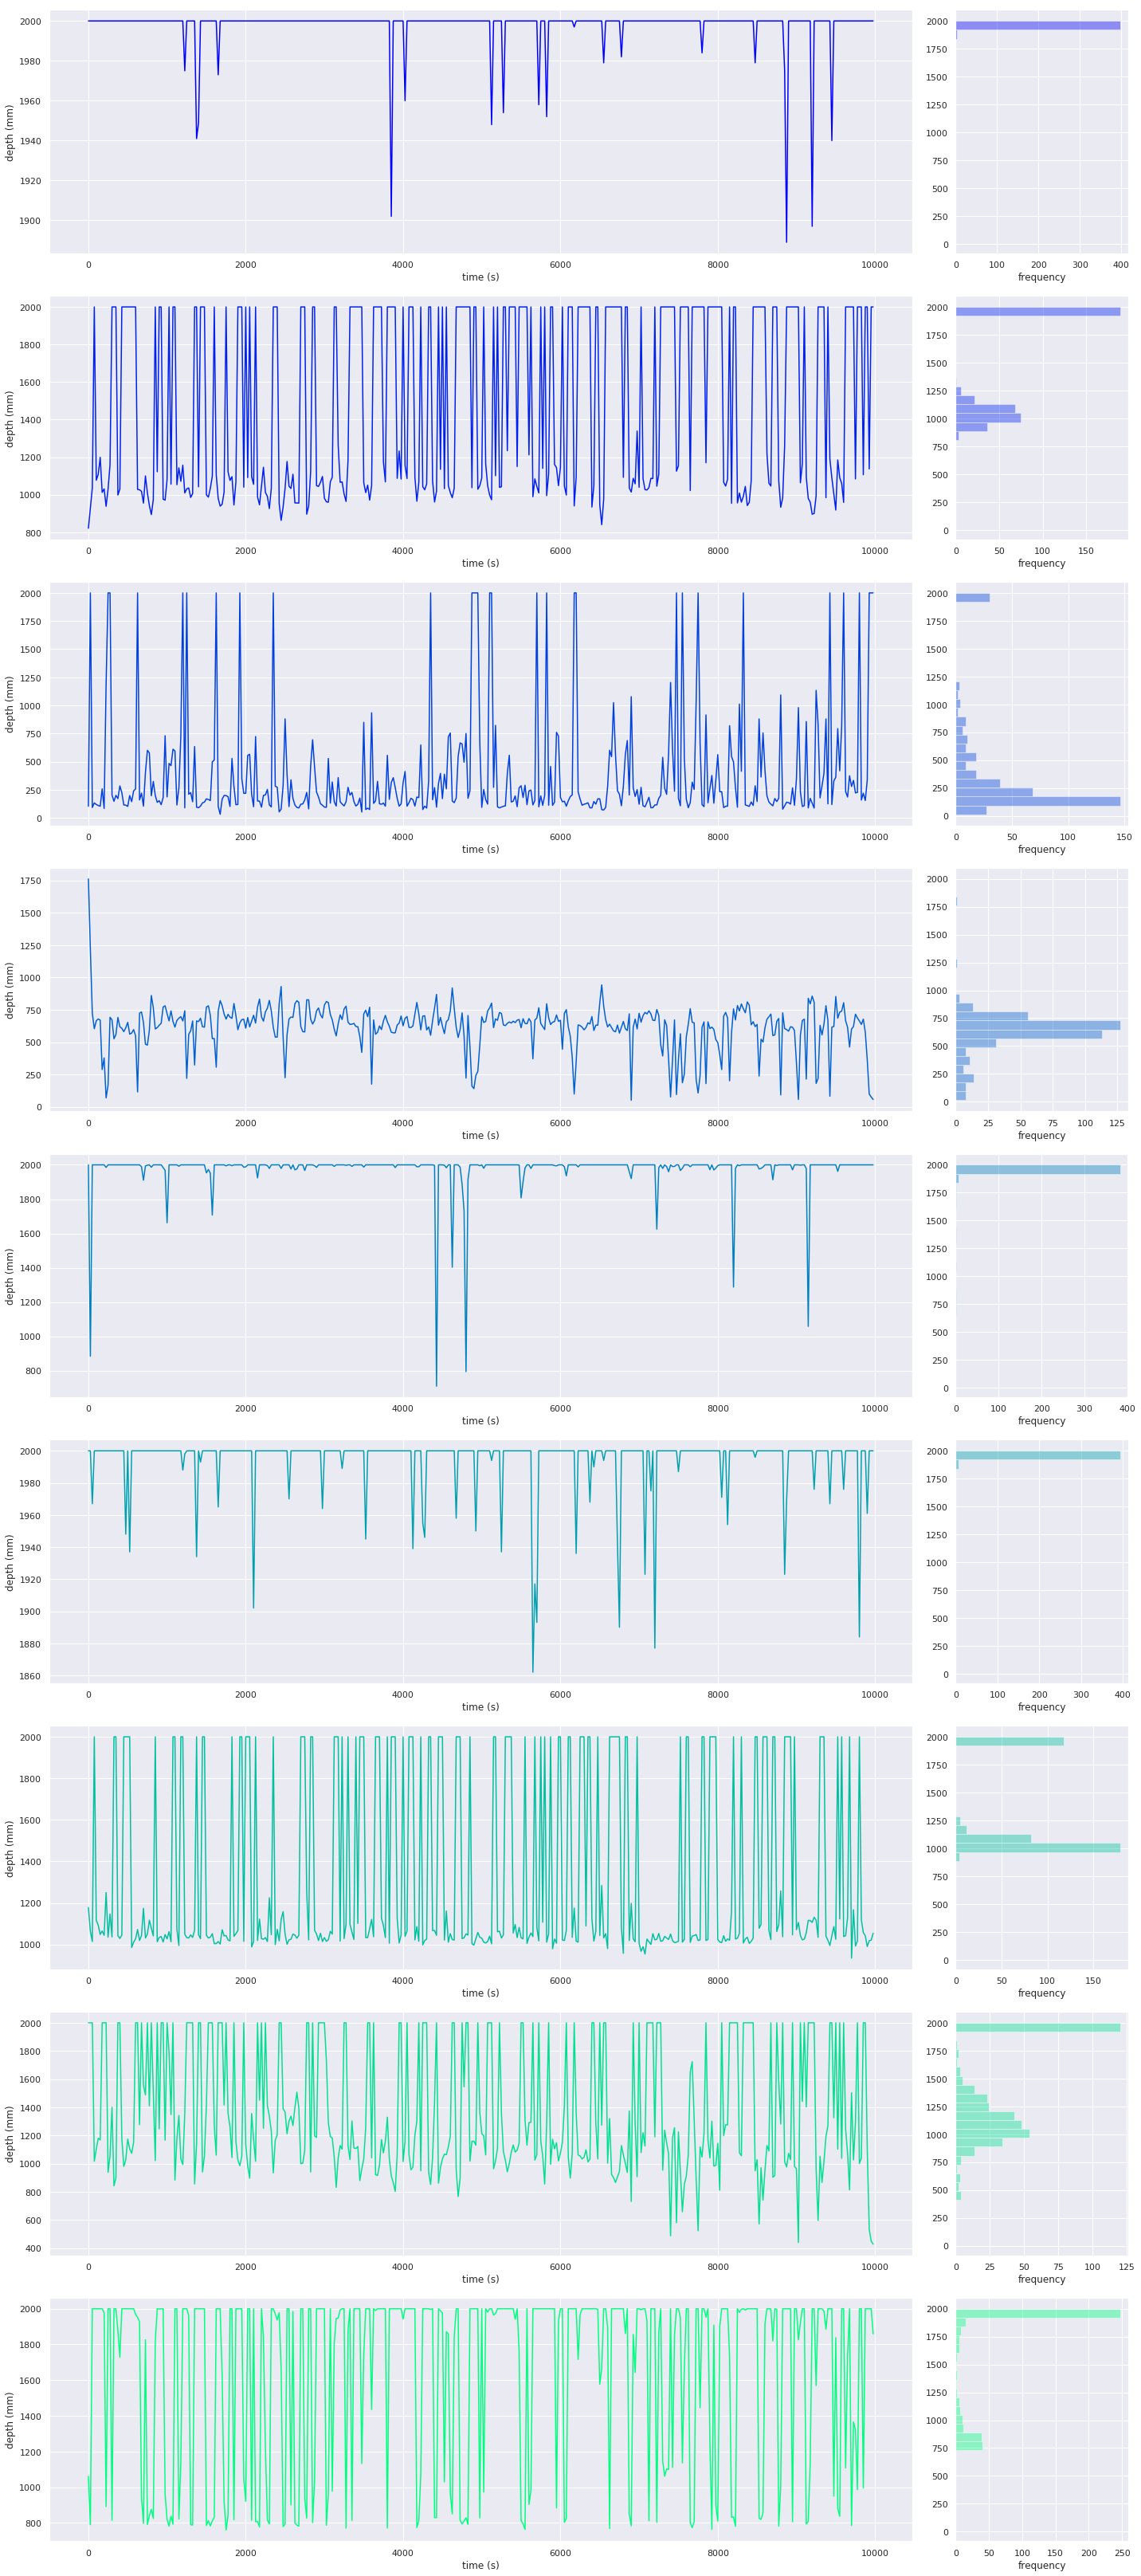

In [8]:
t = np.arange(num_samples)
colors = cm.winter(np.linspace(0, 1, num_channels))
fig = plt.figure(figsize=(20, 5*num_channels))
idxs = [i for i in range(0, num_samples, stepsize)]

for idx in range(num_channels):
    x = idx % num_channels
    y = 0
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time (s)')
    plt.ylabel('depth (mm)')
    ax0.plot(t[idxs], data[idxs, idx], color=colors[idx])

    ax1 = plt.subplot(gs[x, y+1])
    sns.distplot(data[idxs, idx], ax=ax1, vertical=True, bins=25, kde=False,
                 hist_kws={"color": colors[idx], "range": (np.min(data), np.max(data))}, 
                 kde_kws={"color": colors[idx], "lw": 3})
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
plt.close()

# Visualization of lidar measurements (excluding out of range) together with a histogram of these values

In [13]:
ith_demonstration = 0
raw = np.load('../../data/data_toy/data_new_sampler.pkl'.format(ith_demonstration))
data = raw[0]["lidar"]["measurements"]
data = np.array(data)
num_samples, num_channels = data.shape
stepsize = 1
max_depth = 1800

/home/plopd/Applications/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:226: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if hist_color != color:


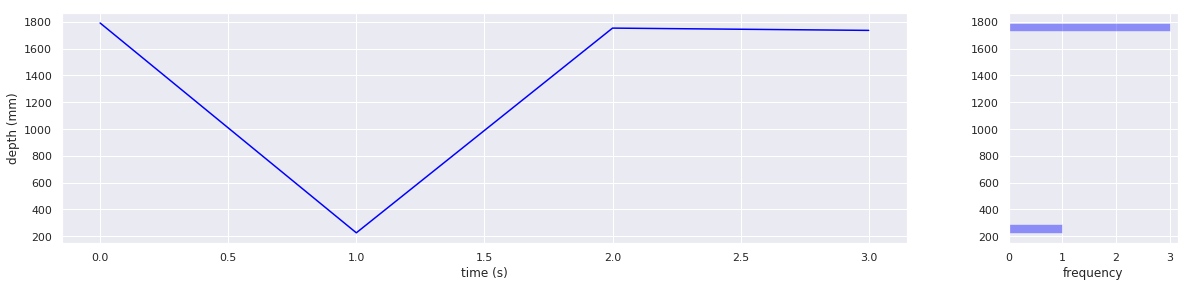

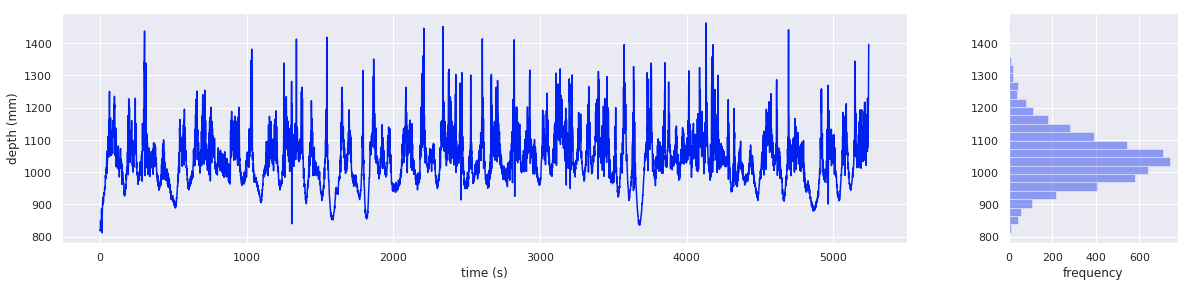

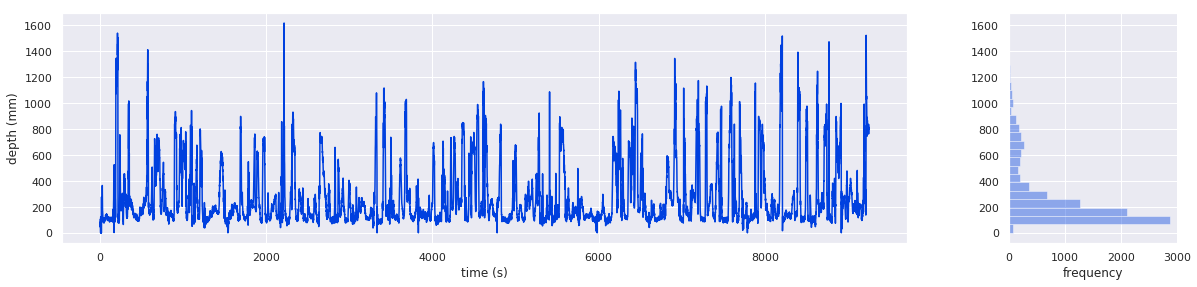

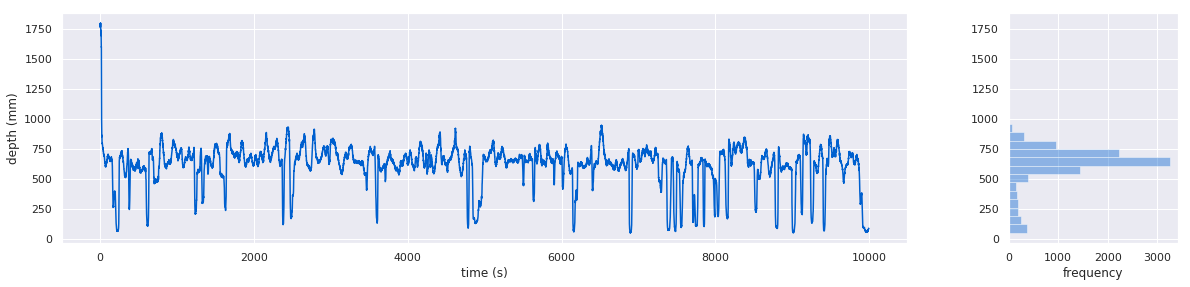

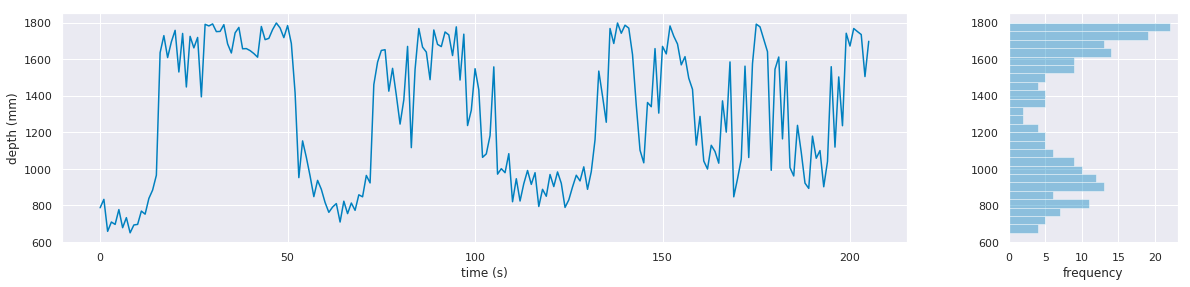

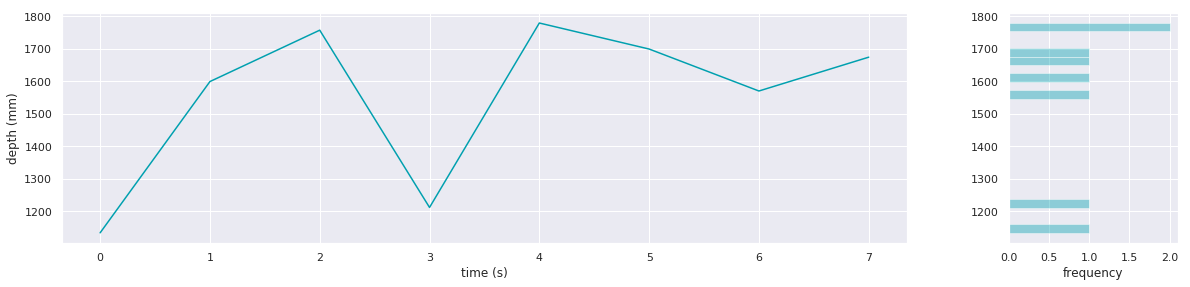

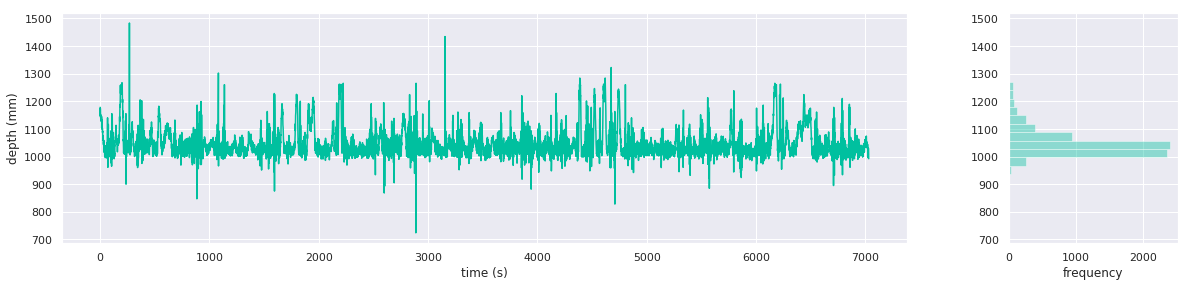

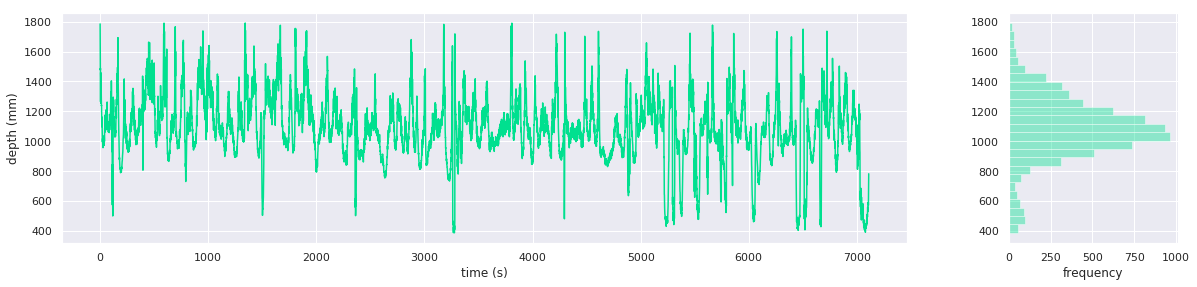

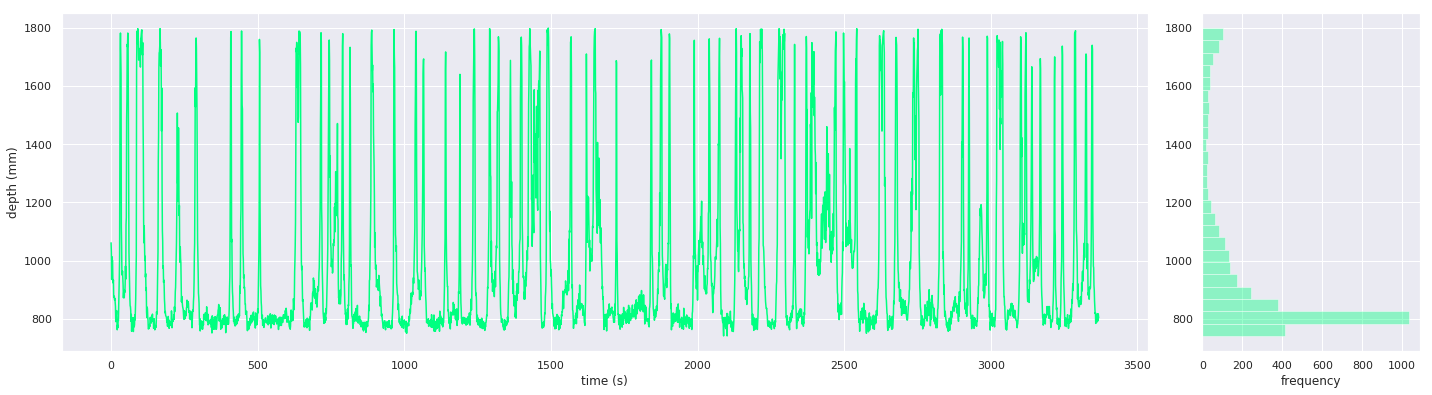

In [14]:
colors = cm.winter(np.linspace(0, 1, num_channels))
t = np.arange(num_samples)
for idx in range(num_channels):
    fig = plt.figure(figsize=(20, 5*num_channels))
    X = data[np.where(data[:, idx] < max_depth)[0], idx]
    num_samples = len(X)
    
    x = idx % num_channels
    y = 0
    gs = gridspec.GridSpec(num_channels, 2, width_ratios=[5, 1])
    ax0 = plt.subplot(gs[x, y])
    plt.xlabel('time (s)')
    plt.ylabel('depth (mm)')
    ax0.plot(X, color=colors[idx])

    ax1 = plt.subplot(gs[x, y+1])
    sns.distplot(X, ax=ax1, vertical=True, bins=25, kde=False,
                 hist_kws={"color": colors[idx], "range": (np.min(X), np.max(X))},
                 kde_kws={"color": colors[idx], "lw": 3})
    plt.xlabel('frequency')
plt.tight_layout()
plt.show()
plt.close()